# 放射線１,２　プログラミング課題

## 2. Braggカーブの描画

前項ではNIST ASTARから生成した運動エネルギーと電離損失の関係式を取り出し，グラフとして描画する例を見ました．

改めて再掲すると以下のようになります．

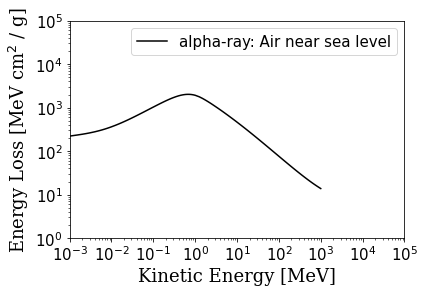

In [1]:
# numpyライブラリを取り込み，以下npという名前で略記します
import numpy as np

# numpy配列をひとつ作り，dataという変数に格納します．arrayとは「配列」の意味です．
data = np.array( [] )

# 以下はおなじみのファイル入力
with open('alpha_air.txt') as f:
    for line in f:
        strs = line.split()
        
        # ここでdataにappend()関数を用いて要素を追加します．appendとは「追加する」という意味です．
        data = np.append( data, [ float( strs[0] ), float( strs[1] ) ] )
        

# numpy配列はこのままだと１次元の列なので，これをN行2列の2次元の列に整形します．
# 左辺のdataは，結果をdataという変数に再代入するという意味です．
data = data.reshape(int(len(data)/2),2 )


# matplotlibの中のpyplotというライブラリを取り込み，pltと略記
from matplotlib import pyplot as plt

# x,y軸をそれぞれ対数軸に変更する
plt.yscale('log')
plt.xscale('log')

# 軸の数字を大きくする
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# x,y軸のタイトルを設定する
plt.xlabel('Kinetic Energy [MeV]', fontsize=18, fontfamily='serif')
plt.ylabel('Energy Loss [MeV cm$^2$ / g]', fontsize=18, fontfamily='serif')

# x,y軸の範囲を手動で設定する
plt.xlim( (1.e-3, 1.e5) )
plt.ylim( (1.0, 1.e5) )


# 2次元配列の1要素目（運動エネルギー）だけ取り出した配列を「X軸」，
# 2要素目（電離損失）だけ取り出した配列を「Y軸」として指定します．
plt.plot(data[:,0],data[:,1], 'k')


# 描画する線の意味を表示する
plt.legend( ['alpha-ray: Air near sea level'], fontsize=15)
plt.show()

今回はこのデータを用いて，実験で霧箱を用いて観察したα線の飛跡や，
シンチレータで観察した発光の特徴をシミュレートしてみようと思います．

その基本となるのがBragg曲線です．

初期運動エネルギーを指定したときのBragg曲線を描画してみましょう．

指針となる考え方は以下のようになります．

1. 運動エネルギーが $T$ であるときの電離損失の大きさ $dE/dx$ は上のグラフで与えられている．データ点が与えられていない部分は線形補間で求める．
1. そのときの位置 $x$ から微小距離 $\Delta x$ をα線が空気中で失うエネルギー $\Delta E$ は
$\Delta E = dE/dx(T)\cdot \Delta x$
である．これを逆に解いて，ある固定した $\Delta E$ を失うのにかかる飛行距離 $\Delta x$ を求めることができる．
1. 次のステップの位置 $x+\Delta x$を決める．その位置での運動エネルギーは$T(x) - \Delta E$である．
1. 手順1.から繰り返す．
1. 運動エネルギーが十分小さくなった時点で打ち止めにする．
1. 位置 $x$ とその位置での電離損失 $dE/dx$ をデータ列として記録し，描画することでBragg曲線を得る．

自信のある人はここから独力で実装しても良いですし，
以下のヒントを頼りに進めても良いです．

### 1. 線形補間の関数の作成

まず任意の運動エネルギー $T$ に対して，対応する電離損失を補間で求める関数`getdEdx()`を作りましょう．

線形補間を行うのに，`numpy`の関数`numpy.interp(x, x_data, y_data)`が使えます．

In [2]:
def getdEdx(T):
    global data
    return np.interp( T, data[:,0], data[:,1])

# T = 5.5 MeVのときの dE/dx を表示．
print( getdEdx(5.5) )

712.2


### 2. $\Delta E$の大きさの検討
固定した $\Delta E$ に対する飛行距離 $\Delta x$を求めたいのですが，$\Delta E$をどの程度の大きさに選んだら良いでしょうか．
$\Delta E$を大きく取りすぎるとステップが粗すぎて，十分な精度でBragg曲線を描けません．
逆に$\Delta E$が小さすぎると繰り返しの手順が無駄に多すぎて，計算時間が不必要にかかります．

初期エネルギーを 5.5 MeV と仮定して，適正な $\Delta E$を選びます．

In [ ]:
T  = 5.5 # [MeV]
dE = ...

### 3. 飛行距離 $\Delta x$の決定

ここからは，繰り返しの構造を取るため，以下のような`while`ループで実装します．

ただし下のコードは一部が埋められていません．適切に直しましょう．

In [ ]:
Emin = 1.e-3
x = 0

# Bragg曲線を表す配列
bragg = np.array( [] )

# 無限ループ: break条件が必ず必要！
while True:
    
    # 現在の運動エネルギーに対応するdE/dxを求め，
    # その時のdxを計算する．
    # このとき，"dE/dx"のdxは密度で規格化されていることに注意して，
    # [cm]の次元を与えるように適切に換算する必要がある．
    dEdx = ...
    dx = ...
    
    # Bragg曲線データに追加
    bragg = np.append( bragg, [x, dEdx] )
    
    # 位置 x と運動エネルギー T を更新する．
    x += ...
    T -= ...

    # もし運動エネルギーがEminを下回ったら打ち切る
    if T < Emin:
        break

# データの整形を忘れずに！
bragg = bragg.reshape( int(len(bragg)/2), 2 )
print( bragg )

データが得られればあとはそれを描画するだけです！
結果のプロットを提出してください．